# The Sparks Foundation - June 2021

## Task 3 : Exploratory Data Analysis - Retail

### Author : Kunal

## Problem Statement :
* As a business manager, try to find out the weak areas where you can work to make more profit.
* What all business problems you can derive by exploring the data?
* Dataset : https://bit.ly/3i4rbWl

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Importing Dataset

In [2]:
store = pd.read_csv('SampleSuperstore.csv')

In [3]:
store.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
store.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


## Exploratory Data Analyis

In [5]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
store.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
store.shape

(9994, 13)

In [8]:
# Checking for Null Values
store.isna().sum().to_frame('Null Values')

,Null Values
Ship Mode,0
Segment,0
Country,0
City,0
State,0
Postal Code,0
Region,0
Category,0
Sub-Category,0
Sales,0


In [9]:
# Checking for Duplicates
store.duplicated().sum()

17

In [10]:
# Removing Duplicates
store = store.drop_duplicates()
store.head()


,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [11]:
#checking for unique values
for u in store.columns:
  print(u,len(store[u].unique()))

Ship Mode 4
Segment 3
Country 1
City 531
State 49
Postal Code 631
Region 4
Category 3
Sub-Category 17
Sales 5825
Quantity 14
Discount 12
Profit 7287


In [12]:
# Dropping Unnecessary columns from the Dataset
store = store.drop(columns=['Postal Code', 'Country'], axis=1)
store.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Visualization

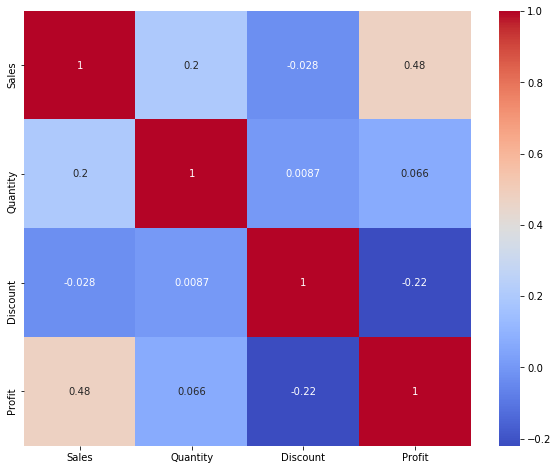

In [13]:
# Drawing Heatmap to identify correlation between numerical columns:
plt.figure(figsize=(10,8))
correlation=store.corr()
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.show()

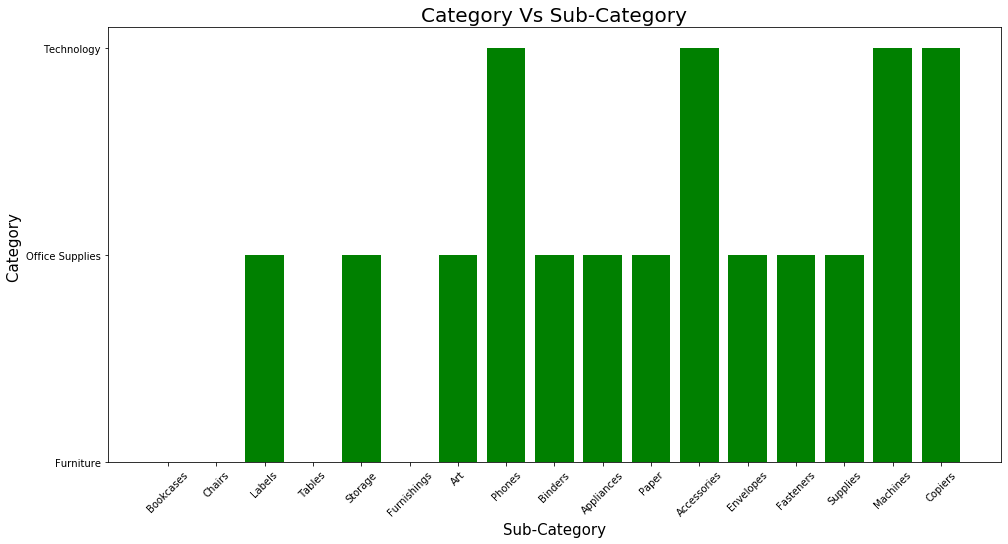

In [14]:
plt.figure(figsize=(16,8))
plt.bar("Sub-Category","Category",data=store, color= 'Green')
plt.title('Category Vs Sub-Category',fontsize=20)
plt.xlabel('Sub-Category',fontsize=15)
plt.ylabel('Category ',fontsize=15)
plt.xticks(rotation=45)
plt.show()

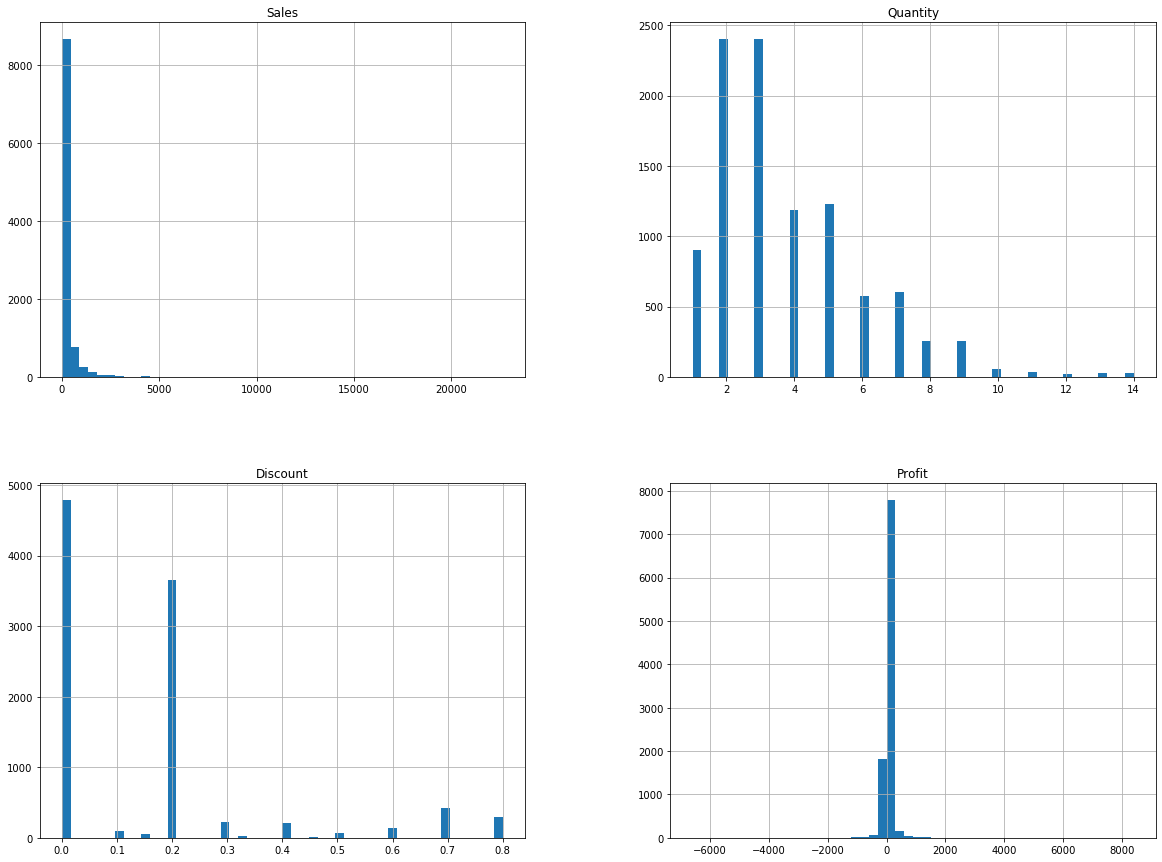

In [15]:
store.hist(bins=50,figsize=(20,15))
plt.show()

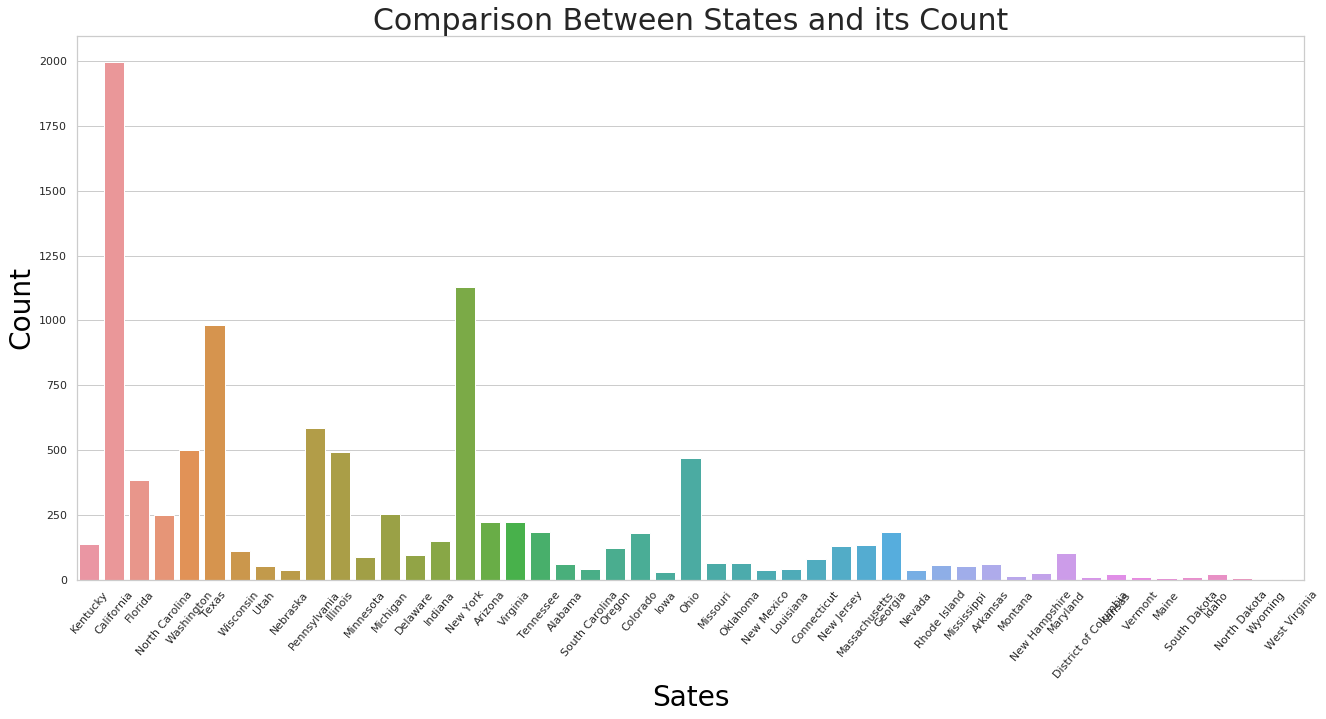

In [22]:
plt.figure(figsize=(22,10))
sns.countplot(x=store['State'])
plt.title('Comparison Between States and its Count',size = '30')
plt.xlabel('Sates',size='28',color = 'black')
plt.ylabel('Count',size='28',color = 'black')
plt.xticks(rotation=50)
plt.show()

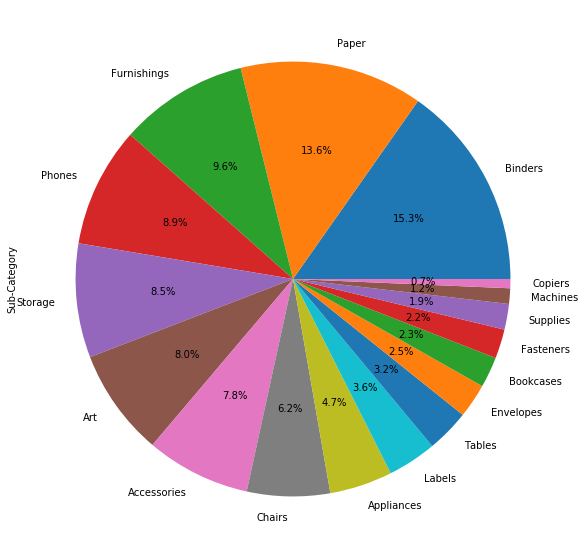

In [17]:
plt.figure(figsize=(12,10))
store['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

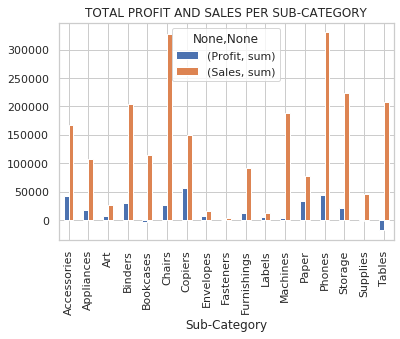

In [20]:
store.groupby('Sub-Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.title('TOTAL PROFIT AND SALES PER SUB-CATEGORY')
plt.show()

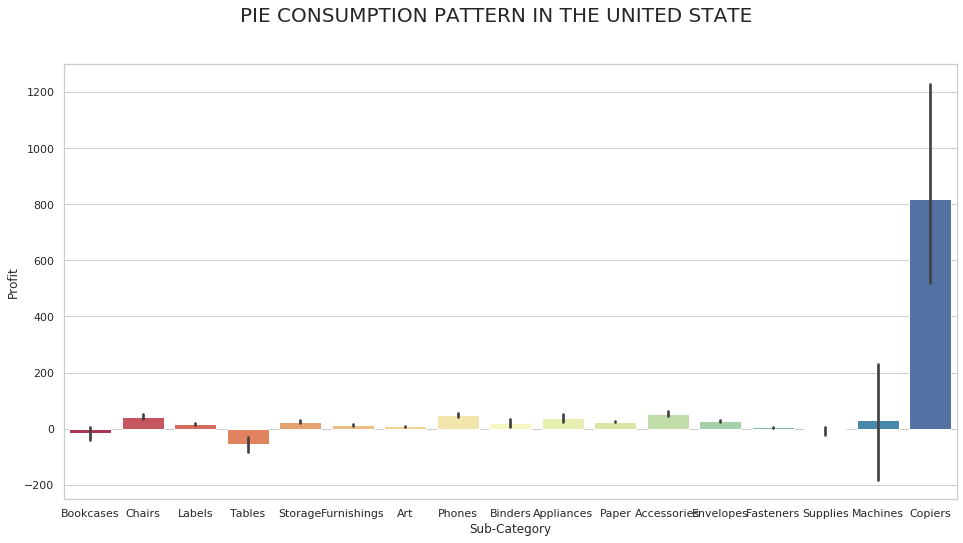

In [24]:
sns.set(style="whitegrid")
plt.figure(2,figsize=(16,8))

sns.barplot(x='Sub-Category',y='Profit',data=store, palette='Spectral')
plt.suptitle('PIE CONSUMPTION PATTERN IN THE UNITED STATE',fontsize=20)

plt.show()

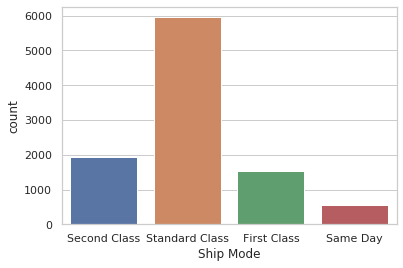

In [26]:
# Analysis based on Shipping mode
sns.countplot(x=store['Ship Mode'])

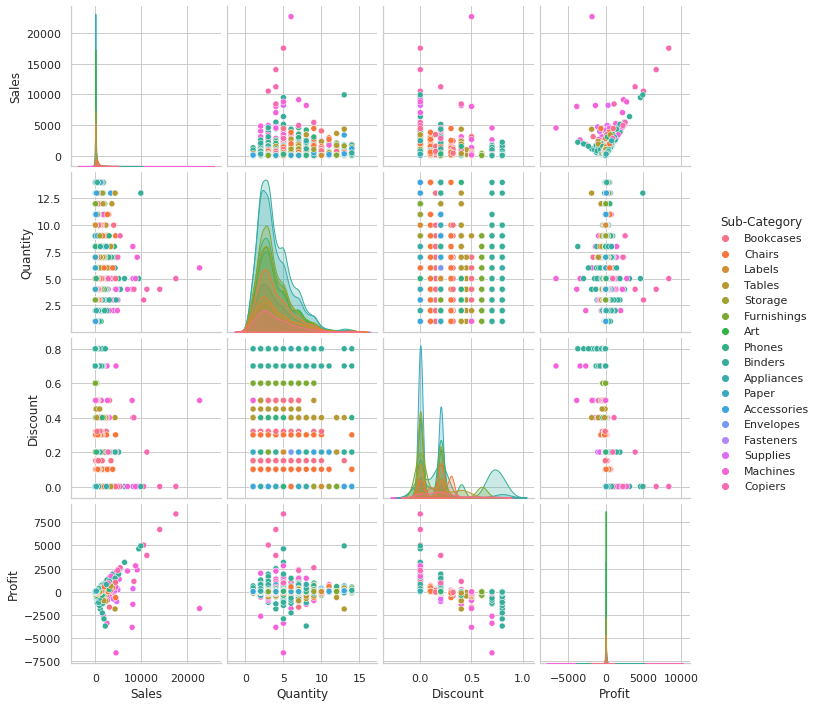

In [27]:
# ploting pair plot for Sub-Category
figsize=(15,10)
sns.pairplot(store,hue='Sub-Category')
plt.show()

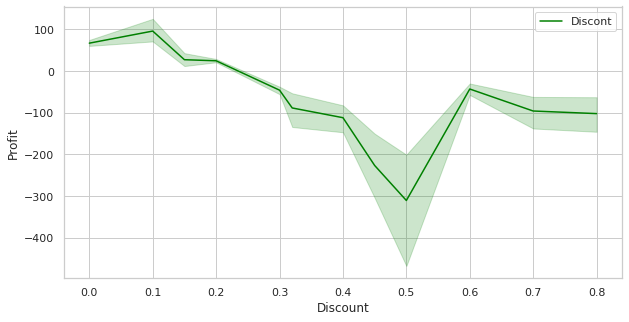

In [29]:
plt.figure(figsize = (10,5))
sns.lineplot("Discount","Profit",data =store, color= 'green',label= 'Discont')
plt.legend()
plt.show()

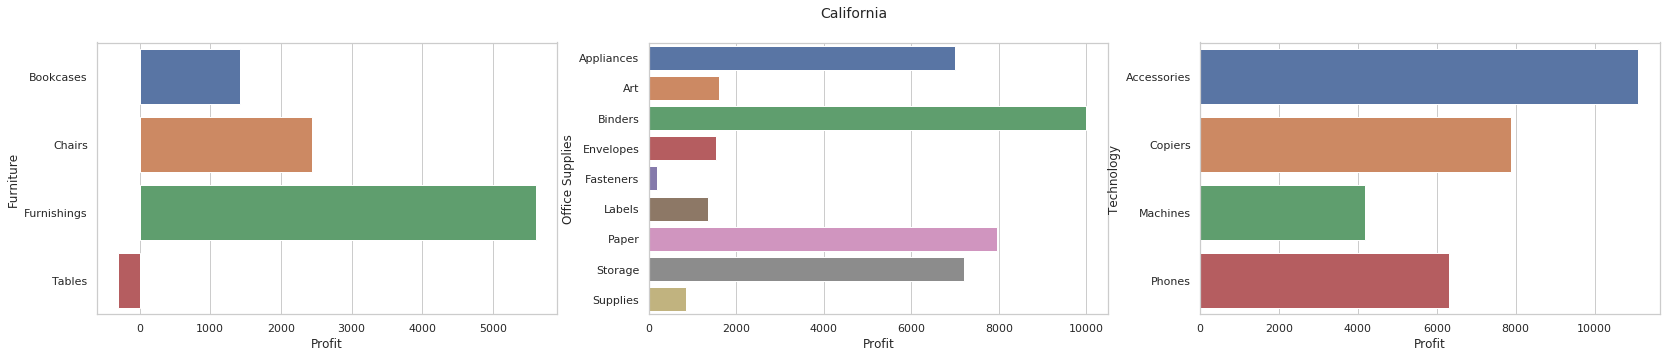

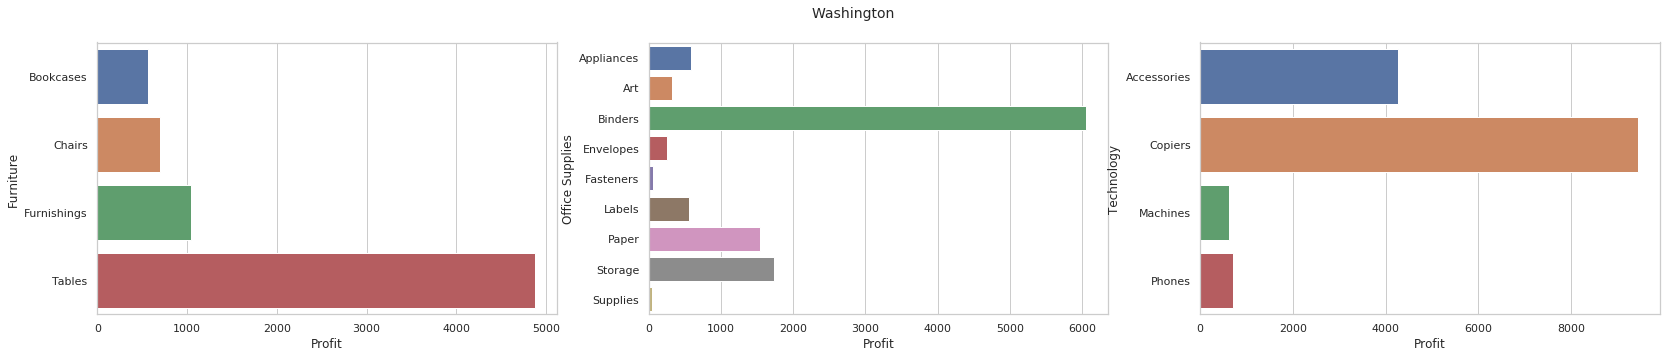

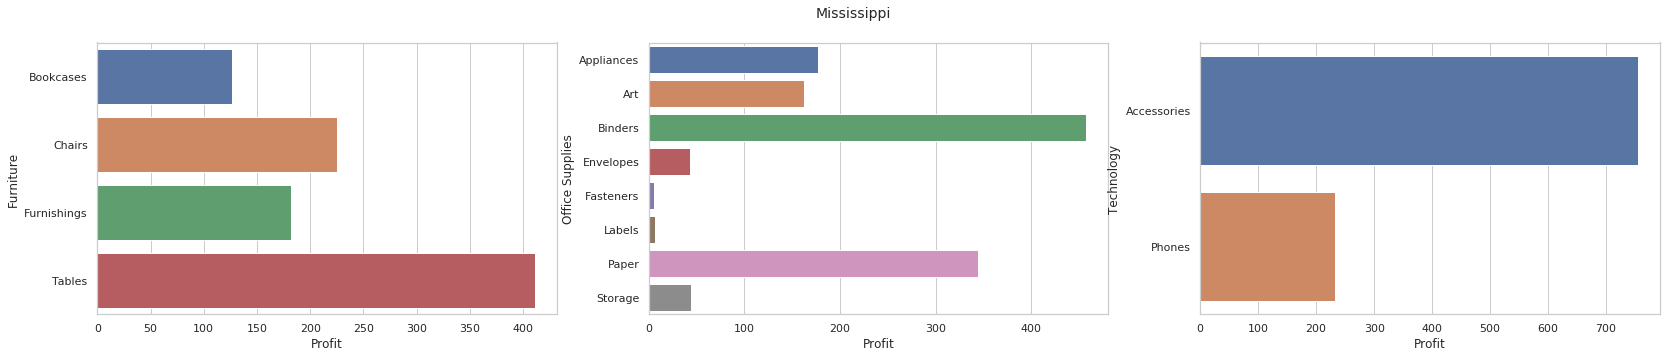

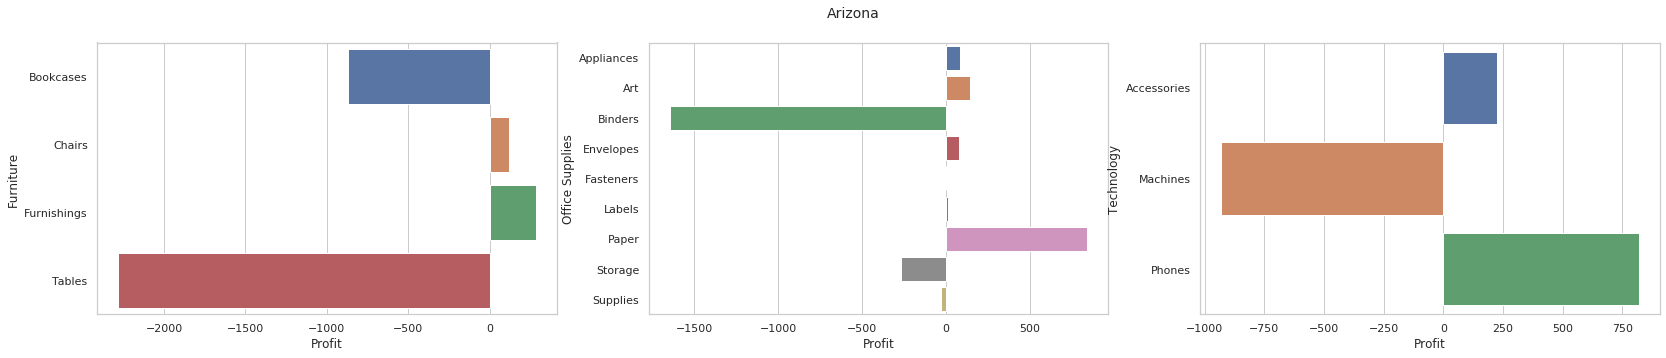

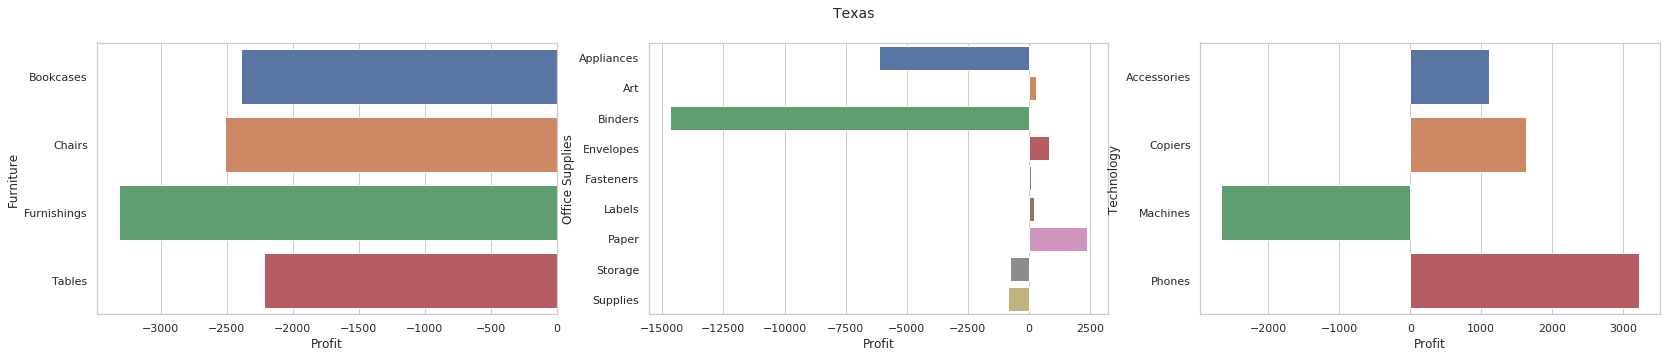

In [30]:
def state_data_viewer(state):
    product_data=store.groupby(['State'])
    for state in states:
        data=product_data.get_group(state).groupby(['Category'])
        fig,ax=plt.subplots(1,3,figsize=(28,5))
        fig.suptitle(state,fontsize=14)
        ax_index=0
        for cat in ['Furniture','Office Supplies','Technology']:
            cat_data=data.get_group(cat).groupby(['Sub-Category']).sum()
            sns.barplot(x=cat_data.Profit,y=cat_data.index,ax=ax[ ax_index])
            ax[ ax_index].set_ylabel(cat)
            ax_index +=1
        fig.show()
states=['California','Washington','Mississippi','Arizona','Texas']
state_data_viewer(states)

## Conclusion
* Product sales increases with increaseing the discount but profit decreases
* In the Ship Mode, Standard shipping is most preferred mode.
* We see that California has the highest sale across all the states while Wyoming has lowest Sale.
* In Category, Office Supplies has more sales as compared to others.
* In sub-Category,Binders are most preferred followed by Paper.

# Thank You